In [ ]:
Trofimov_BBMO-01-24

Goal of this notebook to test several classifiers on the data set with different features

Цель этого блокнота — протестировать несколько классификаторов на наборе данных с различными характеристиками.

In [1]:
import numpy as np  # Импортирует библиотеку NumPy, которая предоставляет поддержку для работы с массивами и матрицами, а также множество математических функций.
import pandas as pd  # Импортирует библиотеку Pandas, используемую для работы с данными в формате таблиц (DataFrame).
import matplotlib as mpl  # Импортирует библиотеку Matplotlib, которая используется для создания графиков и визуализации данных.
import matplotlib.pyplot as plt  # Импортирует модуль pyplot из Matplotlib для создания графиков.
import seaborn as sns  # Импортирует библиотеку Seaborn, которая строится на основе Matplotlib и упрощает создание статистических графиков.
import string  # Импортирует модуль string, который предоставляет константы и функции для работы со строками.
from sklearn.feature_extraction.text import TfidfVectorizer  # Импортирует TfidfVectorizer для преобразования текстовых данных в числовые векторы с использованием TF-IDF.
from sklearn.model_selection import train_test_split  # Импортирует функцию для разделения данных на обучающую и тестовую выборки.
from nltk.stem import SnowballStemmer  # Импортирует SnowballStemmer из библиотеки NLTK для стемминга (сокращения слов до их основы).
from nltk.corpus import stopwords  # Импортирует список стоп-слов из NLTK, которые обычно игнорируются при обработке текста.

from sklearn.linear_model import LogisticRegression  # Импортирует логистическую регрессию для классификации.
from sklearn.svm import SVC  # Импортирует метод опорных векторов (SVM) для классификации.
from sklearn.naive_bayes import MultinomialNB  # Импортирует наивный байесовский классификатор для многоклассовой классификации.
from sklearn.tree import DecisionTreeClassifier  # Импортирует классификатор на основе дерева решений.
from sklearn.neighbors import KNeighborsClassifier  # Импортирует классификатор K ближайших соседей.
from sklearn.ensemble import RandomForestClassifier  # Импортирует случайный лес, который объединяет несколько деревьев решений для улучшения точности.
from sklearn.ensemble import AdaBoostClassifier  # Импортирует AdaBoost, метод, который комбинирует несколько слабых классификаторов для создания сильного.
from sklearn.ensemble import BaggingClassifier  # Импортирует метод бэггинга, который использует несколько моделей для повышения стабильности и точности.
from sklearn.ensemble import ExtraTreesClassifier  # Импортирует Extra Trees, который является вариантом случайного леса с дополнительными случайными элементами.
from sklearn.metrics import accuracy_score  # Импортирует функцию для вычисления точности модели.


Let's read the data from csv file

In [2]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Now drop "unnamed" columns and rename v1 and v2 to "label" and "message"

Теперь удалите столбцы «unnamed» и переименуйте v1 и v2 в «label» и «message».

In [3]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

Let's look into our data

Давайте посмотрим на наши данные

In [4]:
sms.groupby('label').describe()
# sms.groupby('label'): Эта часть кода группирует данные в DataFrame sms по уникальным значениям в столбце label.
# Это позволяет разделить данные на группы, основанные на метках (например, "спам" и "не спам"), что полезно для анализа и сравнения различных категорий.
#После группировки, метод describe() генерирует описательную статистику для каждой группы. Это включает в себя такие показатели, как:
#count: количество элементов в каждой группе.
#mean: среднее значение для числовых столбцов.
#std: стандартное отклонение.
#min: минимальное значение.
#25%, 50%, 75%: квартильные значения.
#max: максимальное значение.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Intresting that "Sorry, I'll call later" appears only 30 times here =)

Интересно, что фраза «Извините, я позвоню позже» встречается здесь всего 30 раз =)

Now let's create new feature "message length" and plot it to see if it's of any interest

Теперь давайте создадим новую функцию «длина сообщения» и построим график, чтобы посмотреть, представляет ли она какой-либо интерес.

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()
#Эта строка создает новый столбец в DataFrame sms, который называется length.
#sms['message']: обращается к столбцу message, содержащему текстовые сообщения.
#.apply(len): применяет функцию len к каждому элементу в столбце message, чтобы вычислить длину каждого сообщения (количество символов).
#Результат (длина каждого сообщения) сохраняется в новом столбце length.

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

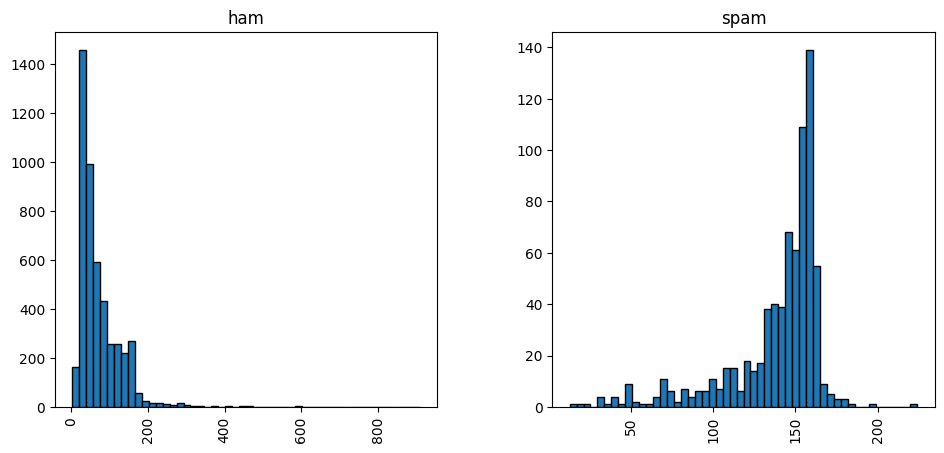

In [6]:
mpl.rcParams['patch.force_edgecolor'] = True # заставляет все патчи (например, бары в гистограммах) иметь цвет границы, даже если цвет границы не задан.
sms.hist(column='length', by='label', bins=50,figsize=(11,5)) # создает гистограмму

Looks like the lengthy is the message, more likely it is a spam. Let's not forget this

Похоже, что сообщение длинное, скорее всего, это спам. Давайте не будем забывать об этом

### Text processing and vectorizing our meddages

Обработка текста и векторизация ваших сообщений

Let's create new data frame. We'll need a copy later on

Давайте создадим новый фрейм данных. Копия нам понадобится позже.

In [7]:
text_feat = sms['message'].copy()

Now define our tex precessing function. It will remove any punctuation and stopwords aswell.

Теперь определим нашу функцию прецессирования tex. Она также удалит все знаки препинания и стоп-слова.

In [8]:
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation)) # translate() для удаления знаков препинания из текста.
    # аблицу перевода, которая указывает, что все символы из string.punctuation (все знаки препинания) должны быть удалены из строки.
    # Это позволяет очистить текст от ненужных символов, которые могут мешать анализу.
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    # строка разбивает текст на слова, используя метод split(), который по умолчанию разделяет строку по пробелам.
    # каждое слово преобразуется в нижний регистр с помощью word.lower(), и проверяется,
    # не находится ли оно в списке стоп-слов (часто встречающихся слов, которые не несут значимой информации,
    # таких как "и", "в", "на" и т.д.) из библиотеки NLTK (stopwords.words('english')).
    # В результате получается список слов, в котором удалены все стоп-слова.

    return " ".join(text) # Эта строка объединяет оставшиеся слова обратно в строку, используя пробел в качестве разделителя.

In [9]:
import nltk #  Natural Language Toolkit для обработки естественного языка
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
text_feat = text_feat.apply(text_process)

In [11]:
# создаётся экземпляр класса
vectorizer = TfidfVectorizer() #  TfidfVectorizer преобразует текстовые данные в числовые векторы

In [12]:
features = vectorizer.fit_transform(text_feat) # выполняет векторизацию текстовых данных, используя ранее созданный экземпляр TfidfVectorizer

###  Classifiers and predictions

First of all let's split our features to test and train set

Для начала давайте разделим наши признаки на тестовый и обучающий наборы.

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)
# разделение данных на обучающую и тестовую выборки
# sms['label']: Это целевая переменная (метки)
# test_size=0.3: Этот параметр указывает, что 30% данных будут отведены для тестовой выборки, а оставшиеся 70% — для обучающей выборки
# начальное значение генератора рандома

Now let's import bunch of classifiers, initialize them and make a dictionary to itereate through

Теперь давайте импортируем несколько классификаторов, инициализируем их и создадим словарь для итерации.

In [14]:
svc = SVC(kernel='sigmoid', gamma=1.0)
# Использует метод опорных векторов для классификации.
# Параметр kernel='sigmoid' указывает на использование сигмоидальной функции в качестве ядра, а gamma=1.0 определяет, как сильно влияет отдельный обучающий пример на решение.
knc = KNeighborsClassifier(n_neighbors=49)
# Реализует алгоритм k-ближайших соседей.
# Параметр n_neighbors=49 указывает, что для классификации будет использоваться 49 ближайших соседей.
mnb = MultinomialNB(alpha=0.2)
# Это наивный байесовский классификатор, подходящий для многоклассовых задач.
# Параметр alpha=0.2 используется для сглаживания, что помогает избежать нулевых вероятностей.
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
# Создает дерево решений для классификации.
# Параметр min_samples_split=7 указывает минимальное количество образцов, необходимое для разделения узла.
lrc = LogisticRegression(solver='liblinear', penalty='l1')
# Логистическая регрессия для бинарной классификации.
# Параметр solver='liblinear' указывает на использование алгоритма liblinear, а penalty='l1' применяет L1-регуляризацию.
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
#Создает ансамбль деревьев решений для улучшения точности.
#Параметр n_estimators=31 указывает количество деревьев в лесу.
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
#Использует метод адаптивного бустинга для повышения точности слабых классификаторов.
#Параметр n_estimators=62 указывает количество базовых классификаторов.
bc = BaggingClassifier(n_estimators=9, random_state=111)
#Реализует метод бэггинга, который обучает несколько экземпляров одного и того же классификатора на различных подвыборках данных.
#Параметр n_estimators=9 указывает количество базовых классификаторов.
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)
#Это еще один ансамблевый метод, который строит множество деревьев решений, но использует случайные подмножества признаков для каждого дерева.
#Параметр n_estimators=9 указывает количество деревьев.

In [15]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Let's make functions to fit our classifiers and make predictions

Давайте создадим функции, соответствующие нашим классификаторам, и сделаем прогнозы.

In [16]:
 # предназначена для обучения классификатора на предоставленных данны
def train_classifier(clf, feature_train, labels_train):
    clf.fit(feature_train, labels_train)
#clf: Это объект классификатора, который обучить
#feature_train: Это набор признаков, используемых для обучения классификатора.
#labels_train: Это метки (labels), соответствующие обучающим данным.
#Метод fit классификатора используется для обучения на предоставленных данных. Он принимает два аргумента: признаки и метки, и на их основе настраивает модель.

In [17]:
# предназначена для предсказания меток классов на основе обученного классификатора и предоставленных признаков
def predict_labels(clf, features):
    return (clf.predict(features))
#clf: Это объект классификатора, который был ранее обучен
#features: Это набор признаков
#Метод predict классификатора используется для получения предсказаний на основе предоставленных признаков. Он возвращает массив меток классов, соответствующих каждому набору признаков.

Now iterate through classifiers and save the results

Теперь пройдитесь по классификаторам и сохраните результаты.

In [18]:
pred_scores = [] # Список для хранения оценок точности каждого классификатора.
pred_dict={} # Словарь для хранения оценок точности с ключами, соответствующими названиям классификаторов.
for k,v in clfs.items(): # Проход по всем классификаторам в словаре clfs, где k — это название классификатора, а v — сам объект классификатора.
    train_classifier(v, features_train, labels_train) # Обучение текущего классификатора на обучающих данных.
    pred = predict_labels(v,features_test) # Получение предсказаний для тестовых данных.
    pred_scores.append((k, [accuracy_score(labels_test,pred)])) # Вычисление точности предсказаний, сравнивая их с истинными метками labels_test.
    pred_dict[k]=[accuracy_score(labels_test,pred)] # происходит сохранение оценки точности предсказаний для каждого классификатора в словаре pred_dict
    # Результаты добавляются в pred_scores и pred_dict для дальнейшего анализа.

In [19]:
df = pd.DataFrame.from_dict(pred_dict,orient='index', columns=['Score'])
df
#pd.DataFrame.from_dict(): Это метод библиотеки pandas, который позволяет создать DataFrame из словаря. В данном случае, для преобразования словаря pred_dict в табличный формат.
#pred_dict: Это словарь, где ключами являются названия классификаторов, а значениями — списки с оценками точности.
#orient='index': Этот параметр указывает, что ключи словаря будут использоваться как индексы строк в DataFrame. То есть, каждая строка DataFrame будет соответствовать одному классификатору.
#columns=['Score']: Этот параметр задает название столбца в DataFrame. В данном случае, столбец будет называться "Score", и в нем будут храниться оценки точности классификаторов.

,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.933014
BgC,0.966507
ETC,0.977273


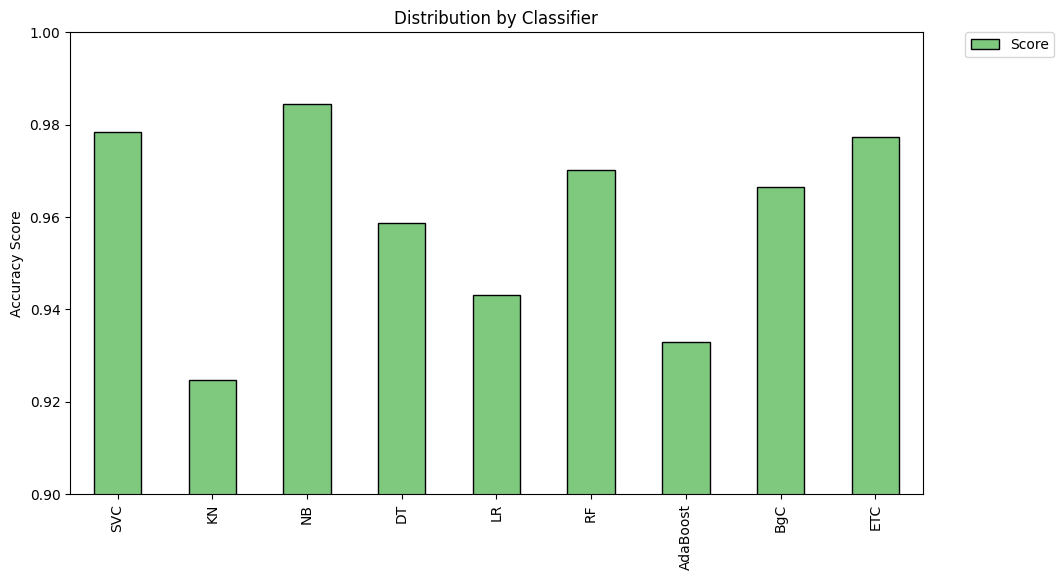

In [20]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent") # создает столбчатую диаграмму
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like ensemble classifiers are not doing as good as expected.

Похоже, ансамблевые классификаторы работают не так хорошо, как ожидалось.

### Stemmer

Define our stemmer function

Определим нашу функцию стеммера

In [21]:
# Процесс, называемый стеммингом, позволяет упростить слова, удаляя суффиксы и окончания, чтобы привести их к базовой форме.
def stemmer (text):
    text = text.split() # Разделяет входной текст на отдельные слова, создавая список слов
    words = "" # Инициализирует пустую строку words, в которую будут добавляться стеммированные слова.
    for i in text:
            stemmer = SnowballStemmer("english") # Создает экземпляр стеммера для английского языка
            words += (stemmer.stem(i))+" " # Стеммирует текущее слово i и добавляет его к строке words, добавляя пробел после каждого слова
    return words # Возвращает строку, содержащую стеммированные слова

In [22]:
text_feat = text_feat.apply(stemmer) # применяет функцию стеммирования к каждому элементу в объекте text_feat

In [23]:
features = vectorizer.fit_transform(text_feat) # для преобразования текстовых данных в числовые векторы

In [24]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)
# разделение данных на обучающую и тестовую выборки
# sms['label']: Это целевая переменная (метки)
# test_size=0.3: Этот параметр указывает, что 30% данных будут отведены для тестовой выборки, а оставшиеся 70% — для обучающей выборки
# начальное значение генератора рандома

In [25]:
pred_dict={}
for k,v in clfs.items(): # перебираются все классификаторы в словаре clfs, где k — это имя классификатора, а v — сам классификатор.
    train_classifier(v, features_train, labels_train) # вызывается функция для обучения текущего классификатора v на тренировочных данных features_train и labels_train
    pred = predict_labels(v,features_test) # используется обученный классификатор для предсказания меток на тестовых данных features_test
    pred_dict[k]=[accuracy_score(labels_test,pred)] # вычисляется точность предсказаний с помощью функции accuracy_score, которая сравнивает истинные метки labels_test с предсказанными метками pred.
    #Результат сохраняется в словаре pred_dict под ключом k

In [26]:
df2 = pd.DataFrame.from_dict(pred_dict,orient='index', columns=['Score2'])
# здесь создается новый DataFrame df2 из словаря pred_dict.
#Параметр orient='index' указывает, что ключи словаря будут использоваться как индексы строк в DataFrame.
#Столбец будет назван 'Score2'
df = pd.concat([df,df2],axis=1)
#используется функция pd.concat() для объединения двух DataFrame: df и df2.
#Параметр axis=1 указывает, что объединение будет происходить по столбцам (горизонтально).
#Это означает, что столбцы из df2 будут добавлены к существующим столбцам в df
df

,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.928230
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.933014,0.934809
BgC,0.966507,0.968900
ETC,0.977273,0.977871


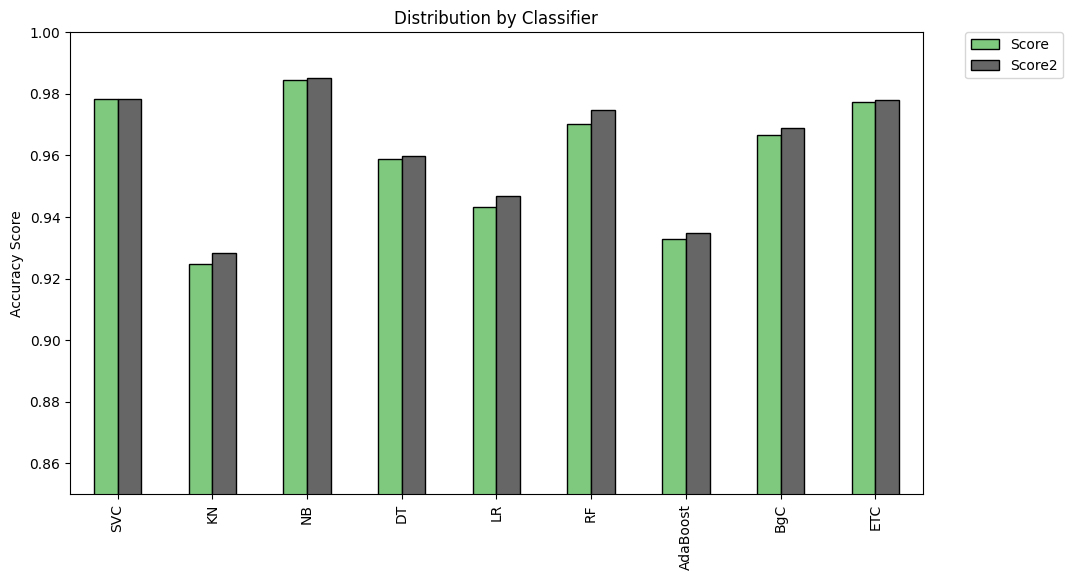

In [28]:
# создаем столбчатую диаграмму для визуализации точности различных классификаторов.
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like mostly the same . Ensemble classifiers doing a little bit better, NB still got the lead.

Похоже, в основном то же самое. Классификаторы ансамблей работают немного лучше, NB по-прежнему лидирует.

### Voting classifier

Классификатор голосования

We are using ensemble algorithms here, but what about ensemble of ensembles? Will it beat NB?

Мы здесь используем ансамблевые алгоритмы, а как насчет ансамбля ансамблей? Превзойдет ли он NB?

In [29]:
from sklearn.ensemble import VotingClassifier
#VotingClassifier — это модель машинного обучения, которая объединяет несколько классификаторов для улучшения точности предсказаний.
#Он работает по принципу голосования, где каждый классификатор в ансамбле делает предсказание,
#и итоговое решение принимается на основе большинства голосов или усреднения вероятностей.

In [31]:
# создаетcя экземпляр VotingClassifier, который объединяет несколько классификаторов для улучшения предсказаний
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')
# используется soft voting, что означает, что итоговое предсказание будет основано на усреднении вероятностей, выданных каждым классификатором

In [32]:
eclf.fit(features_train,labels_train)
# обучение модели

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(n_estimators=9,
                                                random_state=111)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=9,
                                                   random_state=111)),
                             ('RF',
                              RandomForestClassifier(n_estimators=31,
                                                     random_state=111)),
                             ('Ada',
                              AdaBoostClassifier(n_estimators=62,
                                                 random_state=111))],
                 voting='soft')

In [33]:
pred = eclf.predict(features_test)
# Получение предсказаний на тестовых данных

In [34]:
print(accuracy_score(labels_test,pred))
# для вычисления точности модели
# Функция accuracy_score вычисляет долю правильных предсказаний среди всех предсказаний
#Функция проверяет, сколько из предсказанных меток совпадают с истинными.
#Доля правильных предсказаний делится на общее количество предсказаний, чтобы получить значение точности.

0.9784688995215312


Better but nope.

Лучше, но нет.

### Final verdict - well tuned NaiveBayes is your friend in spam detection.

Окончательный вердикт — хорошо настроенный NaiveBayes — ваш друг в обнаружении спама.